<center><p float="center">
  <img src="https://upload.wikimedia.org/wikipedia/commons/e/e9/4_RGB_McCombs_School_Brand_Branded.png" width="300" height="100"/>
  <img src="https://mma.prnewswire.com/media/1458111/Great_Learning_Logo.jpg?p=facebook" width="200" height="100"/>
</p></center>

<h1><center><font size=10>Data Science and Business Analytics</center></font></h1>
<h1><center>Supervised Learning Classification: Decision Tree - Week 2</center></h1>


<center><img src="https://img.freepik.com/free-photo/axis-cnc-mills-machines-design-configuration-that-utilizes-swivel-head-machine-table-flush-with-surface-metalworking-industrial_67340-733.jpg?w=996" width="800" height="500"></center>

<b><h2><center>Machine Failure Prediction</center></h2></b>

## Problem Statement

### Business Context

System failure is a common issue across the manufacturing industry, where a variety of machines and equipment are used. In most cases, it becomes important to be able to **predict machine failures by analyzing system data and taking preventive measures to be able to tackle them**. This is known as predictive maintenance and with the rising availability of data and computational resources, the use of such data-driven, proactive maintenance methods has resulted in several benefits like minimized downtime of the equipment, minimized cost associated with spares and supplies, etc.

AutoMobi Engineering Pvt. Ltd is an auto component manufacturing company. The manufacturing facility of AutoMobi consists of numerous products machined on several CNC (Computer Numerical Controlled) machines. In an attempt to transition to a **data-driven maintenance process**, the company had set up sensors in various locations to collect data regarding the various parameters involved in the manufacturing process. Initially, they want to try it in an injector nozzle manufacturing shop where they are manufacturing fuel injector nozzles for automobile engines using various manufacturing processes (like turning, drilling, etc). The company has been collecting **data on an hourly basis from these sensors and aims to build ML-based solutions using the data to optimize cost, improve failure predictability, and minimize the downtime of equipment.**

### Objective

AutoMobi has recently been encountering a problem with frequent equipment failure in the fuel injector nozzle manufacture unit, leading to disturbance in the manufacturing process. They have reached out to the Data Science team for a solution and shared **data for the past three months**. As a member of the Data Science team, you are tasked with analyzing the data and developing a **Machine Learning model to detect potential machine failures, determine the most influencing factors on machine health, and provide recommendations for cost optimization to the management.**

### Data Description

The data contains the different attributes of machines and health. The detailed data dictionary is given below.

**Data Dictionary**

* UDI: Unique identifier ranging from 1 to 10000
* Type: The type of product consisting of low(60% of all products), medium(30%), and high(10%) quality corresponding to L, M, and H
* Air temperature: Ambient temperature (in the machine shop) measured in Kelvin
* Process Temperature: Tool tip temperature measured in Kelvin
* Rotational Speed: Rotational speed of the machine spindle measured in revolutions per minute (rpm)
* Torque: Torque acting on the machine spindle measured in Newton meter (Nm)
* Tool wear: Tool wear measured in micrometers (During the manufacturing process, continuous rubbing of the tool on the workpiece leads to the wearing of the tool material. The tool wear is measured as the amount of wear on the cutting face of the tool measured in micrometers)
* Failure: 0-No failure, 1-Failure

## Importing the necessary libraries

In [1]:
# this will help in making the Python code more structured automatically (help adhere to good coding practices)
#%load_ext nb_black

#import warnings
#warnings.filterwarnings("ignore")

# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)
# setting the precision of floating numbers to 5 decimal points
pd.set_option("display.float_format", lambda x: "%.5f" % x)

# Library to split data
from sklearn.model_selection import train_test_split

# To build model for prediction
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# To tune different models
from sklearn.model_selection import GridSearchCV

# To get diferent metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    make_scorer,
)

## Loading the dataset

In [2]:
df_main = pd.read_csv("Predictive_Maintenance_Case_Study.csv")

In [3]:
# copying data to another variable to avoid any changes to original data
data = df_main.copy()

## Overview of the dataset

### View a number of sample rows of the dataset.

In [4]:
data.sample(n=10)

,UDI,Type,Air temperature,Process temperature,Rotational speed,Torque,Tool wear,Failure
2804,2805,L,300.10000,327.07407,1450,40.10000,100,0
1122,1123,L,296.50000,320.03704,1541,38.50000,98,0
773,774,L,296.80000,321.51852,1510,39.40000,29,0
8562,8563,L,298.10000,324.85185,1351,52.40000,102,0
7910,7911,M,300.80000,337.07407,1664,25.70000,150,0
9459,9460,L,298.40000,325.59259,1579,36.10000,123,0
454,455,L,297.40000,324.11111,1468,46.60000,94,0
8078,8079,L,300.30000,335.22222,1571,31.20000,123,0
3030,3031,M,300.40000,327.44444,1563,34.00000,6,0
5094,5095,M,304.10000,341.88889,1470,45.80000,85,0


* There are three types of products those are L, M, and H (Low, Medium, and High quality).
* The `UDI` column is containing unique values.

**ADEL's NOTE**: 
- we cannot make this observations from a few rows only...don't jump to conclusions !
- It is not clear how the time variable is reflected in this dataset. We are told we have 3 months of data. Is each row a machine or multiple rows correspond to a singe machine at different timestamps ?

### Check the shape, data types of the columns for the dataset.

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   UDI                  10000 non-null  int64  
 1   Type                 10000 non-null  object 
 2   Air temperature      10000 non-null  float64
 3   Process temperature  10000 non-null  float64
 4   Rotational speed     10000 non-null  int64  
 5   Torque               10000 non-null  float64
 6   Tool wear            10000 non-null  int64  
 7   Failure              10000 non-null  int64  
dtypes: float64(3), int64(4), object(1)
memory usage: 625.1+ KB


* The dataset has 10000 rows and 8 columns.
* The `Type` column is of *object* type while the rest columns are numeric in nature
* We have no missing values in the dataset.

### Dropping the duplicate values

In [6]:
# checking for duplicate values
data.duplicated().sum()

0

Let's further check the duplicates by UDI

In [7]:
data.duplicated(subset = 'UDI').sum()

0

* There are no duplicate values in the data.

* The `UDI` column contains only unique values, so we can drop it

**ADEL'S NOTE**: This is because UDI is an identifier, not because it has unique values. We don't, for exemple, drop a time variable juste because it has unique values ...

In [8]:
data = data.drop(["UDI"], axis=1)

### Statistical summary of the data

**Let's check the statistical summary of the data.**

In [9]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Air temperature,10000.00000,300.00493,2.00026,295.30000,298.30000,300.10000,301.50000,304.50000
Process temperature,10000.00000,328.94652,5.49531,313.00000,324.48148,329.29630,333.00000,343.00000
Rotational speed,10000.00000,1538.77610,179.28410,1168.00000,1423.00000,1503.00000,1612.00000,2886.00000
Torque,10000.00000,39.98691,9.96893,3.80000,33.20000,40.10000,46.80000,76.60000
Tool wear,10000.00000,107.95100,63.65415,0.00000,53.00000,108.00000,162.00000,253.00000
Failure,10000.00000,0.03390,0.18098,0.00000,0.00000,0.00000,0.00000,1.00000


* The `air temperature` ranges from 295K to 304.5K. Usually, machine shops are maintained in control environment so the temperature range looks usual.
* The `process temperature` is a bit higher than the `air temperature` and that's quite usual because heat is continuously generated during the machining process. (**ADEL'S NOTE**: I would expect a much larger difference)
* The `rotational speed` has a max value of 2886rpm while 1612rpm at the 75th percentile. Some of the processes are performed at a higher speed than usual.

## <a name='link2'>Exploratory Data Analysis (EDA) Summary</a>

### **Note**: The EDA section has been covered multiple times in the previous case studies. In this case study, we will mainly focus on the model building aspects. We will only be looking at the key observations from EDA. The detailed EDA can be found in the <a href = #link1>appendix section</a>.

**The below functions need to be defined to carry out the EDA.**

In [10]:
def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [11]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

In [12]:
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

In [13]:
### function to plot distributions wrt target


def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

### Univariate Analysis

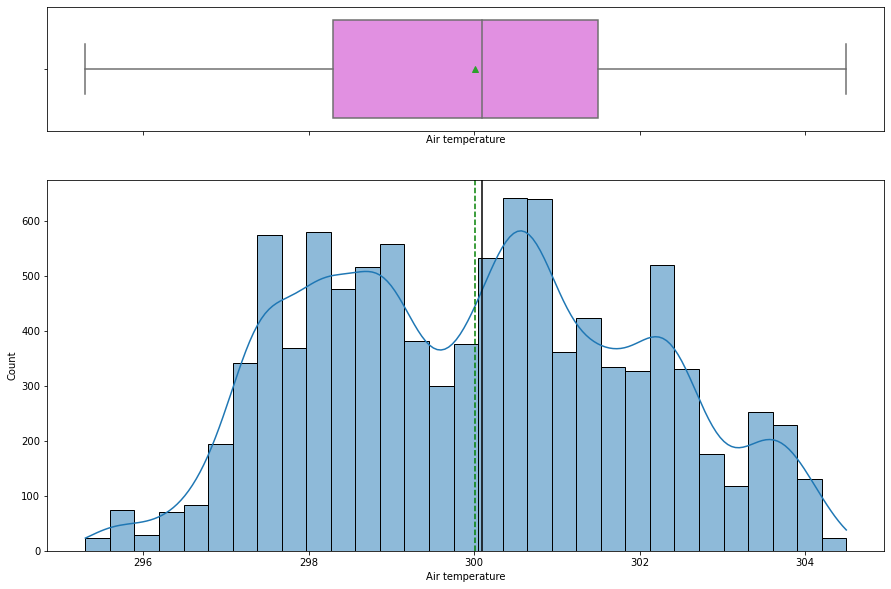

In [14]:
histogram_boxplot(data, "Air temperature", kde = True)

* The `air temperature` distribution looks slightly left skewed with a mean temperature around 300K.
* There is no outlier present.

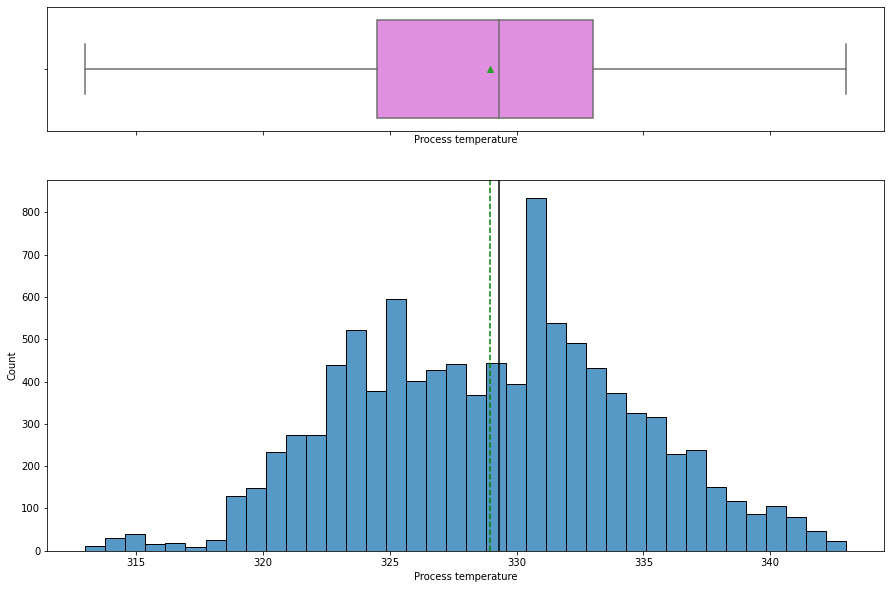

In [15]:
histogram_boxplot(data, "Process temperature")

* The `process temperature` distribution looks slightly left skewed with a mean temperature around 329K.
* There is no outlier present.

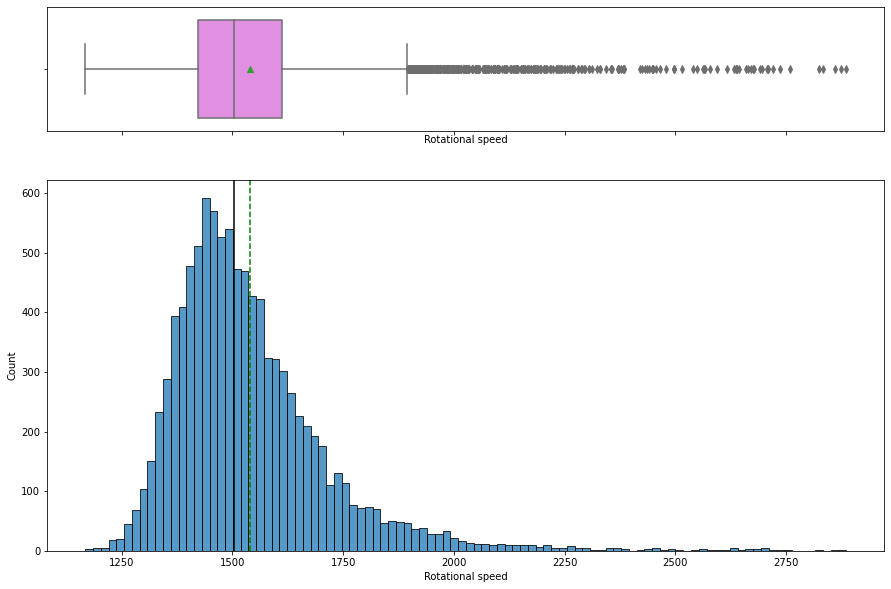

In [16]:
histogram_boxplot(data, "Rotational speed")

* The `rotational speed` is right skewed with many outliers on the upper quartile.
* Some of the manufacturing operations are performed at a higher speed. 

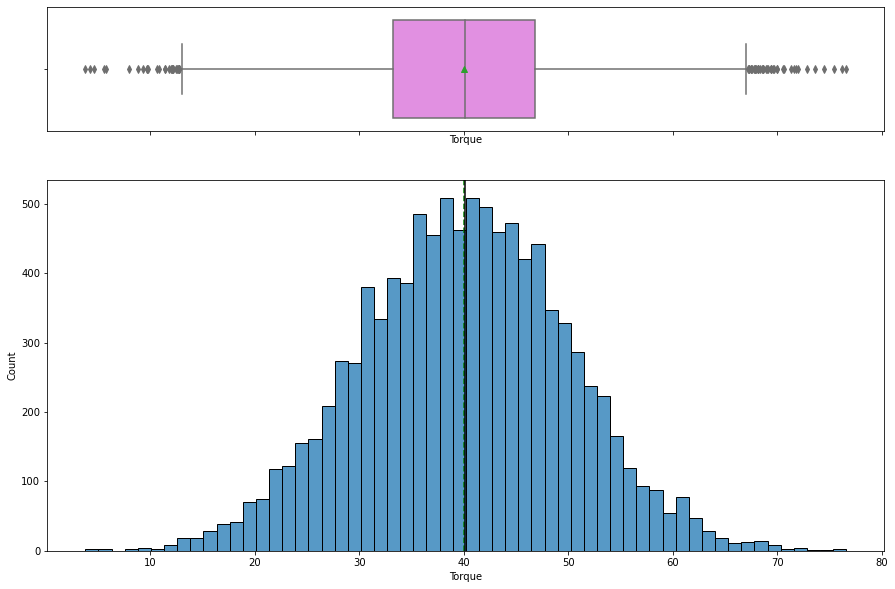

In [17]:
histogram_boxplot(data, "Torque")

* The distribution of `torque` is normal with mean torque around 40 Nm.
* Outliers are present on both sides.

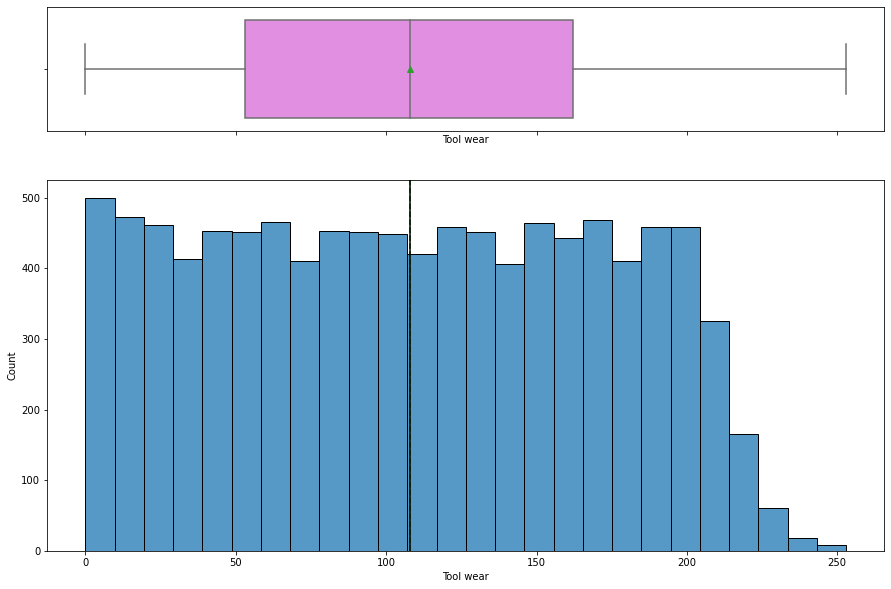

In [18]:
histogram_boxplot(data, "Tool wear")

* `Tool wear` is uniformly distributed with some of the higher values being less frequent.

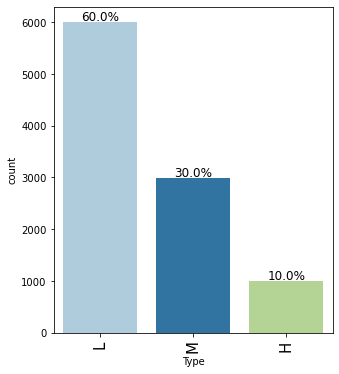

In [19]:
labeled_barplot(data, "Type", perc=True)

* Around 60% of products are of low quality, 30% are of medium quality whereas 10% are of high quality

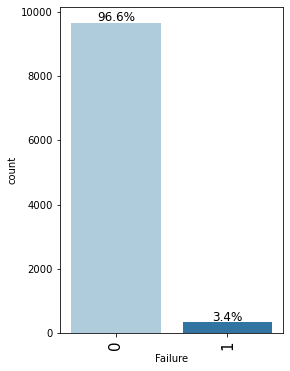

In [20]:
labeled_barplot(data, "Failure", perc=True)

* In 96.6% of observations the machine does not fail while in 3.4% of observations it fails.

**ADEL'S NOTE**: this is a highly imbalanced dataset and this fact shoudl be taken into account while modeling

### Bivariate Analysis

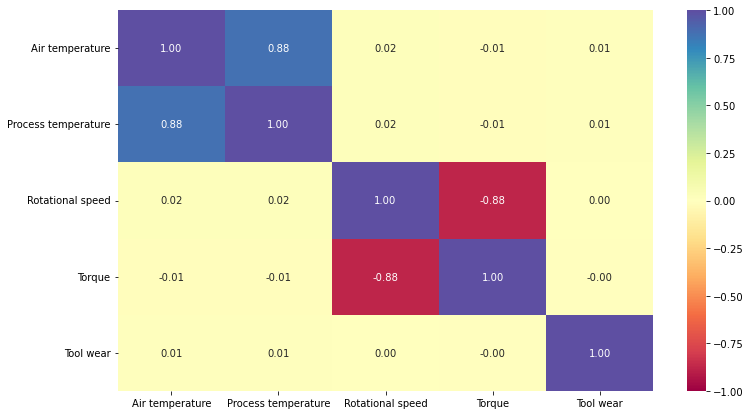

In [21]:
cols_list = data.select_dtypes(include=np.number).columns.tolist()
cols_list.remove('Failure')

plt.figure(figsize=(12, 7))
sns.heatmap(
    data[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

* There's a positive correlation between the `air temperature` and `process temperature`.
* There's a negative correlation between the `rotational speed` and `torque`. 
* No other variables are correlated. We will analyze it further.

**Let's see how the target variable varies across the type of the product**

Failure     0    1    All
Type                     
All      9661  339  10000
L        5765  235   6000
M        2914   83   2997
H         982   21   1003
------------------------------------------------------------------------------------------------------------------------


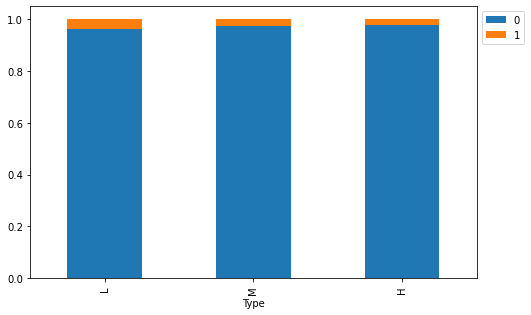

In [22]:
stacked_barplot(data, "Type", "Failure")

* Around 70 % of the failure occurred during machining of L type i.e., low-quality products.
* Machining of high-quality products is less prone to failure.

**Let's analyze the relation between `Process temperature` and `Failure`.**

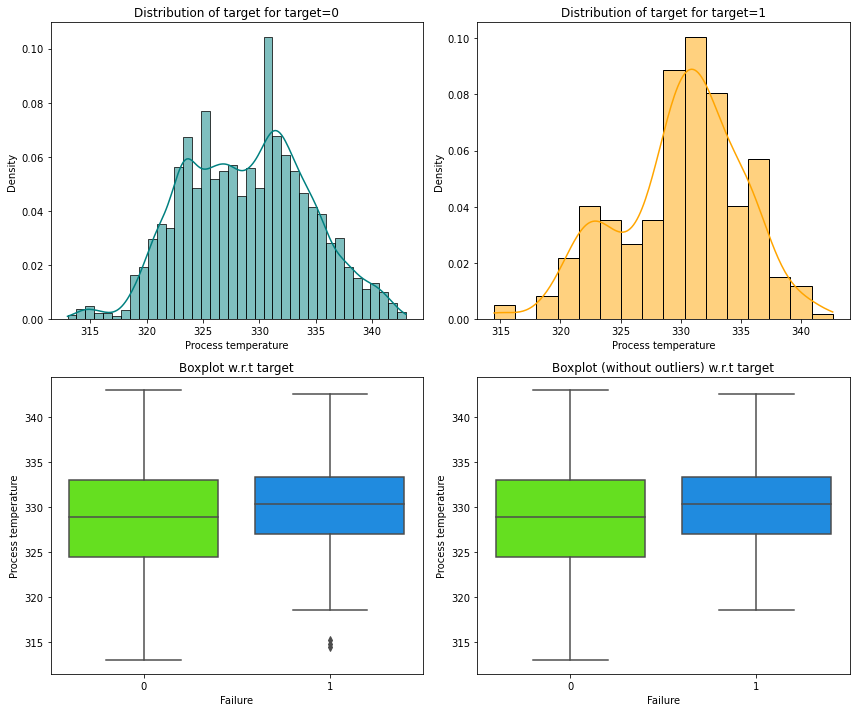

In [23]:
distribution_plot_wrt_target(data, "Process temperature", "Failure")

* Most of the failures of the manufacturing system occur at higher `Process temperature`.

**Let's analyze the relation between `Rotational speed` and `Failure`.**

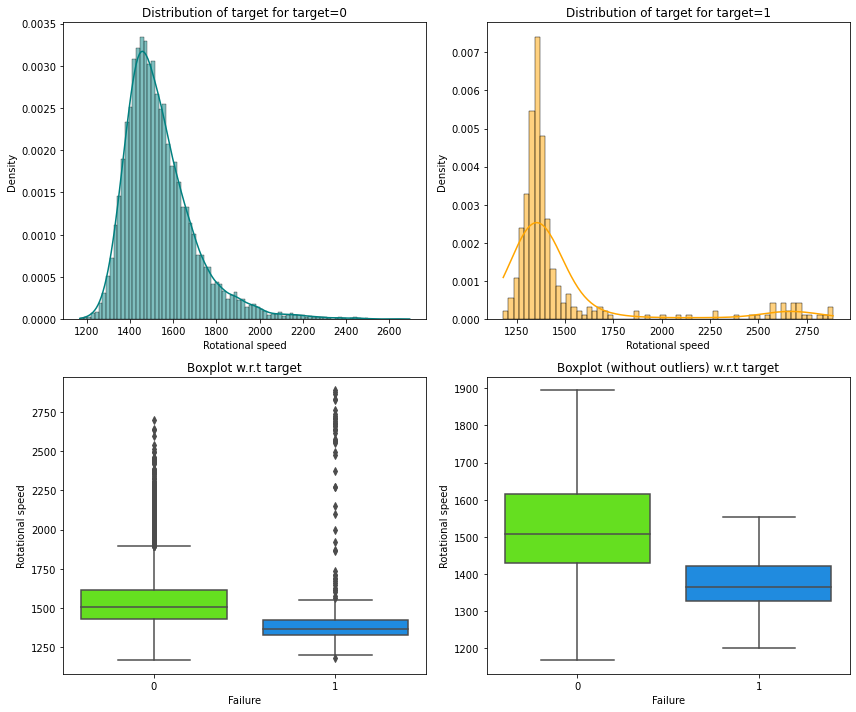

In [24]:
distribution_plot_wrt_target(data, "Rotational speed", "Failure")

* There is a clear boundary showing separation of failure status based of the values of `Rotational speed`.
* Manufacturing system is more prone to failure at lower `Rotational speed` than at higher rotational speed.

#### ADD-ON: Pairplot with target colored points

For Decision Trees, it is helpful to look at two dimensional plots where the points are colored with the target variable

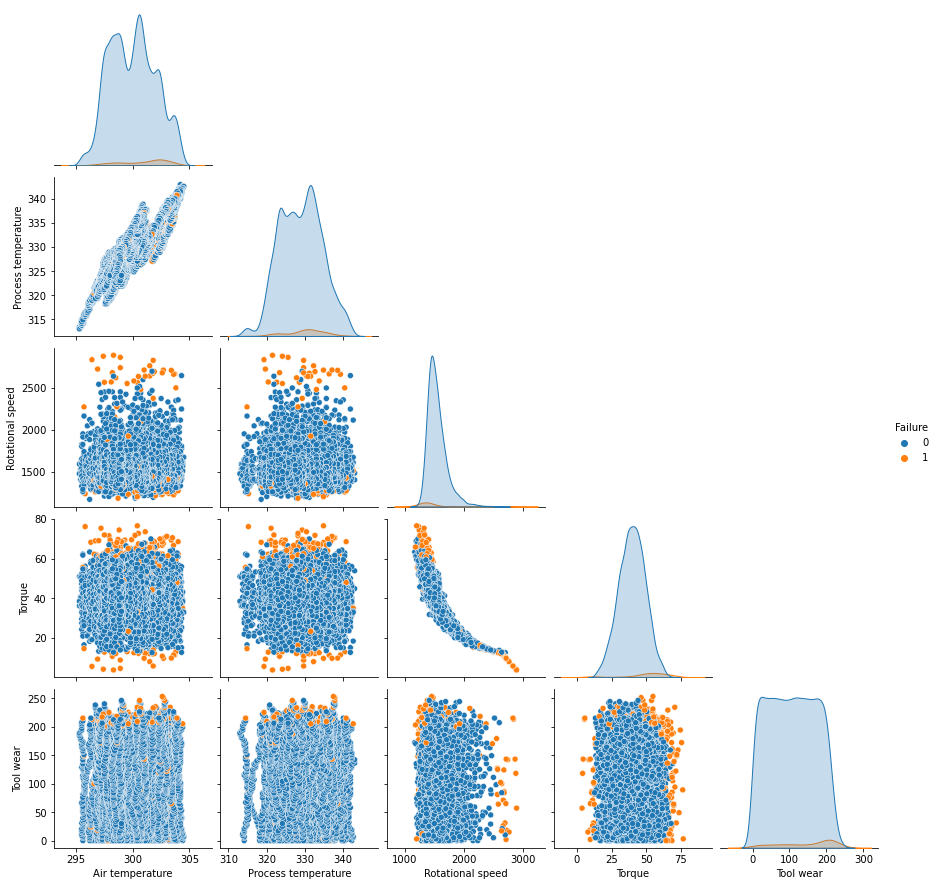

In [25]:
num_features = data.select_dtypes('number').drop(columns = 'Failure').columns
sns.pairplot(data = data, vars = num_features, hue = 'Failure', corner = True)

## Data Preprocessing

### Outlier Detection

**Let's check for outliers in the data.**

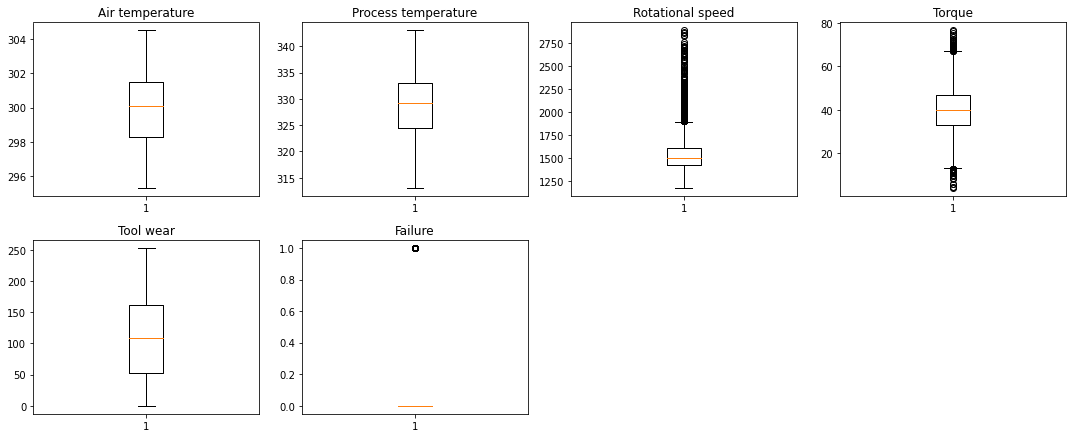

In [26]:
# outlier detection using boxplot
numeric_columns = data.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(15, 12))

for i, variable in enumerate(numeric_columns):
    plt.subplot(4, 4, i + 1)
    plt.boxplot(data[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

Observations

* There are quite a few outliers in the data.
* However, we will not treat them as they are proper values

### Data Preparation for Modeling

In [27]:
X = data.drop(["Failure"], axis=1)
Y = data["Failure"]

X = pd.get_dummies(X, drop_first=True)

# Splitting data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.30, random_state=1, stratify = Y #ADEL'S NOTE : added the stratify parameters because the data are imbalanced
)

In [28]:
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (7000, 7)
Shape of test set :  (3000, 7)
Percentage of classes in training set:
0   0.96614
1   0.03386
Name: Failure, dtype: float64
Percentage of classes in test set:
0   0.96600
1   0.03400
Name: Failure, dtype: float64


* We had seen that around 96.6% of observations belongs to class 0 (Not Failed) and 3.39% observations belongs to class 1 (Failed), and this is preserved in the train and test sets

**ADEL'S NOTE**: when the dataset is imbalanced in terms of the target variable, it is important to use a stratified sampling so make sure that the proportion of the minority class is almost the same in the training and testing set

## Model Building

#### Baseline model

It is a good practice to build a simple baseline model to have a minimal performance threshold. Our baseline model will be predicting the majrity class, which is class 0

In [29]:
from sklearn.metrics import classification_report

In [30]:
print(classification_report(y_train, np.zeros(y_train.shape)))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98      6763
           1       0.00      0.00      0.00       237

    accuracy                           0.97      7000
   macro avg       0.48      0.50      0.49      7000
weighted avg       0.93      0.97      0.95      7000



/Users/adelbenlagra/anaconda3/envs/gl/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/adelbenlagra/anaconda3/envs/gl/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/adelbenlagra/anaconda3/envs/gl/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start,

Notice how high is the accuracy with this simple model. However, Accuracy is not a good measure for imbalanced datasets.

### Decision Tree (default)

[Scikit-learn DecisionTreeClassifier documentation](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier)

In [1]:
%%time
model0 = DecisionTreeClassifier(random_state=1)
model0.fit(X_train, y_train)

NameError: name 'DecisionTreeClassifier' is not defined

### Model Evaluation

**Model evaluation criterion**

**Model can make wrong predictions as:**
- Predicting a machine will not fail but in reality, the machine will fail (FN)
- Predicting a machine will fail but in reality, the machine will not fail (FP)

**Which case is more important?**

- If we predict that a machine will not fail but in reality, the machine fails, then the company will have to bear the cost of repair/replacement and also face equipment downtime losses
- If we predict that a machine will fail but in reality, the machine does not fail, then the company will have to bear the cost of inspection
- The inspection cost is generally less compared to the repair/replacement cost

**How to reduce the losses?**

The company would want the recall to be maximized, greater the recall score higher are the chances of minimizing the False Negatives.

In [32]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [33]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

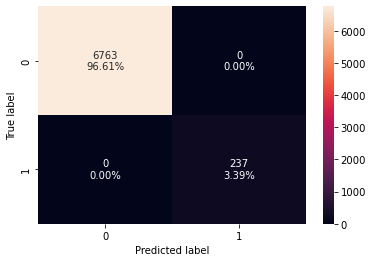

In [34]:
confusion_matrix_sklearn(model0, X_train, y_train)

In [35]:
decision_tree_perf_train_without = model_performance_classification_sklearn(
    model0, X_train, y_train
)
decision_tree_perf_train_without

,Accuracy,Recall,Precision,F1
0,1.00000,1.00000,1.00000,1.00000


* Model is able to perfectly classify all the data points on the training set.
* 0 errors on the training set, each sample has been classified correctly.
* As we know a decision tree will continue to grow and classify each data point correctly if no restrictions are applied as the trees will learn all the patterns in the training set.
* This generally leads to overfitting of the model as Decision Tree will perform well on the training set but will fail to replicate the performance on the test set.

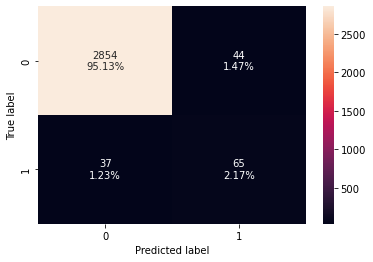

In [36]:
confusion_matrix_sklearn(model0, X_test, y_test)

In [37]:
decision_tree_perf_test_without = model_performance_classification_sklearn(
    model0, X_test, y_test
)
decision_tree_perf_test_without

,Accuracy,Recall,Precision,F1
0,0.97300,0.63725,0.59633,0.61611


The default tree is heavily overfitting the training set ! Furtehrmore, it has a lower

### Decision Tree (with class_weights)

* If the frequency of class A is 10% and the frequency of class B is 90%, then class B will become the dominant class and the decision tree will become biased toward the dominant classes

* In this case, we will set class_weight = "balanced", which will automatically adjust the weights to be inversely proportional to the class frequencies in the input data

* class_weight is a hyperparameter for the decision tree classifier

In [38]:
model = DecisionTreeClassifier(random_state=1, class_weight='balanced')
model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', random_state=1)

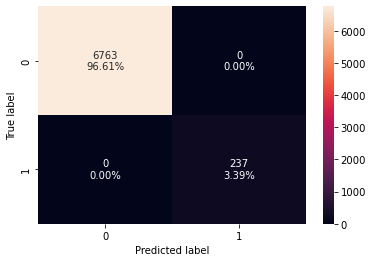

In [39]:
confusion_matrix_sklearn(model, X_train, y_train)

In [40]:
decision_tree_perf_train = model_performance_classification_sklearn(
    model, X_train, y_train
)
decision_tree_perf_train

,Accuracy,Recall,Precision,F1
0,1.00000,1.00000,1.00000,1.00000


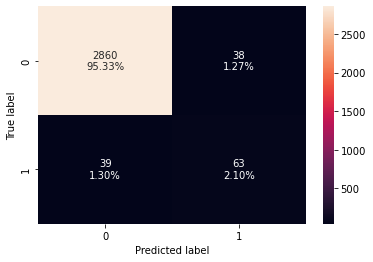

In [41]:
confusion_matrix_sklearn(model, X_test, y_test)

In [42]:
decision_tree_perf_test = model_performance_classification_sklearn(
    model, X_test, y_test
)
decision_tree_perf_test

,Accuracy,Recall,Precision,F1
0,0.97433,0.61765,0.62376,0.62069


We improved a bit the performance mertics with the balancing of the classes. However, we are still overfitting !

**Let's use pruning techniques to try and reduce overfitting.**

### Decision Tree (Pre-pruning)

**Using GridSearch for Hyperparameter tuning of our tree model**

* Hyperparameter tuning is also tricky in the sense that there is no direct way to calculate how a change in the
  hyperparameter value will reduce the loss of your model, so we usually resort to experimentation. i.e we'll use Grid search
* Grid search is a tuning technique that attempts to compute the optimum values of hyperparameters. 
* It is an exhaustive search that is performed on a the specific parameter values of a model.
* The parameters of the estimator/model used to apply these methods are optimized by cross-validated grid-search over a parameter grid.

#### ADEL ADD-ON: getting a sense of the hyperparameters domain search

Before pre-pruning, it is good to know a bit more about the default tree that we built.

In [43]:
model0.get_depth(), model.tree_.n_leaves, model0.tree_.node_count

(20, 210, 271)

The fully grown tree has a depth of 20, a number of final leaves 123 and a total number of nodes 271

In [44]:
%%time
# Choose the type of classifier.
estimator = DecisionTreeClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
    "class_weight": [None, "balanced"],
    "max_depth": np.arange(2, 7, 2),
    "max_leaf_nodes": [50, 50, 75, 150], ## Removed 250 since the tree can not have more than 210 leaves (with class weight)
    "min_samples_split": [10, 30, 50, 70],
}

# Type of scoring used to compare parameter combinations
acc_scorer = make_scorer(recall_score)

# Run the grid search
grid_obj = GridSearchCV(estimator, parameters, scoring=acc_scorer, cv=5, n_jobs=-1)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
estimator.fit(X_train, y_train)

CPU times: user 678 ms, sys: 220 ms, total: 898 ms
Wall time: 5.57 s


DecisionTreeClassifier(class_weight='balanced', max_depth=4, max_leaf_nodes=50,
                       min_samples_split=70, random_state=1)

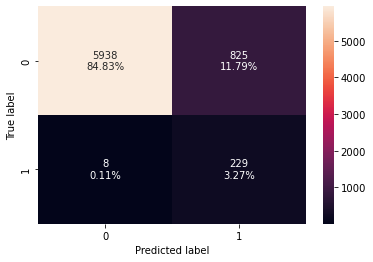

In [45]:
confusion_matrix_sklearn(estimator, X_train, y_train)

In [46]:
decision_tree_tune_perf_train = model_performance_classification_sklearn(
    estimator, X_train, y_train
)
decision_tree_tune_perf_train

,Accuracy,Recall,Precision,F1
0,0.88100,0.96624,0.21727,0.35476


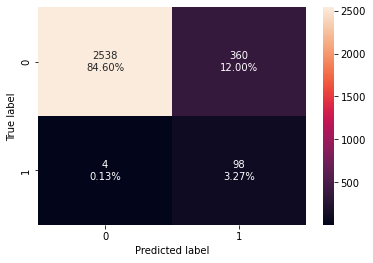

In [47]:
confusion_matrix_sklearn(estimator, X_test, y_test)

In [48]:
decision_tree_tune_perf_test = model_performance_classification_sklearn(
    estimator, X_test, y_test
)
decision_tree_tune_perf_test

,Accuracy,Recall,Precision,F1
0,0.87867,0.96078,0.21397,0.35000


* The model is giving a generalized result now since the recall scores on both the train and test data are coming to be around 0.96 which shows that the model is able to generalize well on unseen data.

In [49]:
feature_names = list(X_train.columns)
importances = estimator.feature_importances_
indices = np.argsort(importances)

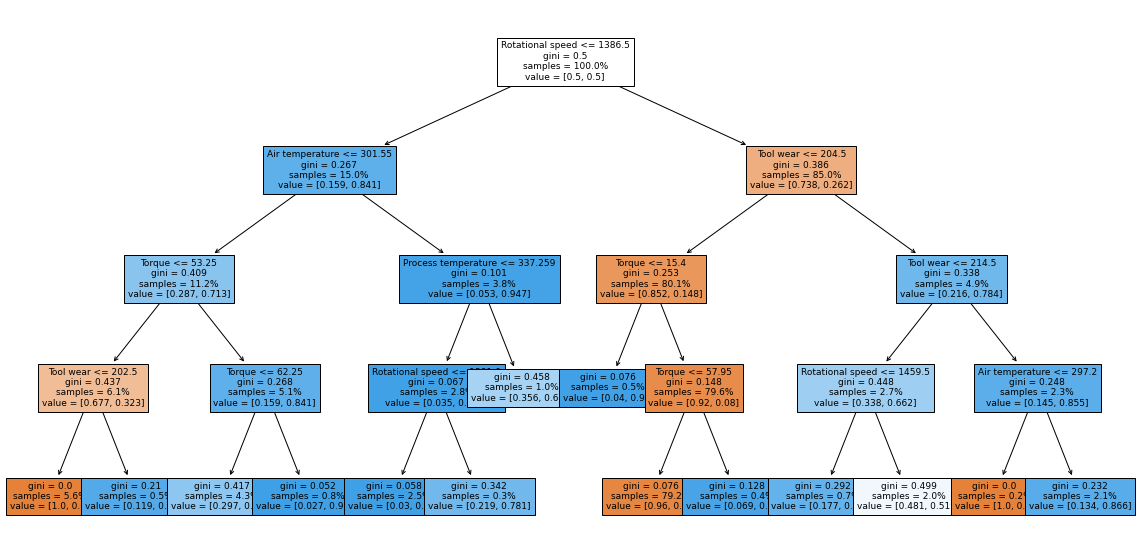

In [50]:
plt.figure(figsize=(20, 10))
out = tree.plot_tree(
    estimator,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
    proportion=True,
    max_depth=4
)
# below code will add arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()


In [51]:
# Text report showing the rules of a decision tree -
print(tree.export_text(estimator, feature_names=feature_names, show_weights=True))

|--- Rotational speed <= 1386.50
|   |--- Air temperature <= 301.55
|   |   |--- Torque <= 53.25
|   |   |   |--- Tool wear <= 202.50
|   |   |   |   |--- weights: [202.87, 0.00] class: 0
|   |   |   |--- Tool wear >  202.50
|   |   |   |   |--- weights: [13.97, 103.38] class: 1
|   |   |--- Torque >  53.25
|   |   |   |--- Torque <= 62.25
|   |   |   |   |--- weights: [143.35, 339.66] class: 1
|   |   |   |--- Torque >  62.25
|   |   |   |   |--- weights: [13.46, 487.34] class: 1
|   |--- Air temperature >  301.55
|   |   |--- Process temperature <= 337.26
|   |   |   |--- Rotational speed <= 1381.00
|   |   |   |   |--- weights: [42.95, 1402.95] class: 1
|   |   |   |--- Rotational speed >  1381.00
|   |   |   |   |--- weights: [8.28, 29.54] class: 1
|   |   |--- Process temperature >  337.26
|   |   |   |--- weights: [32.60, 59.07] class: 1
|--- Rotational speed >  1386.50
|   |--- Tool wear <= 204.50
|   |   |--- Torque <= 15.40
|   |   |   |--- weights: [10.35, 251.05] class: 1
| 

**Observations from the pre-pruned tree:**

Using the above extracted decision rules we can make interpretations from the decision tree model like:

* If the rotational speed is less than or equal to 1379.50, the air temperature is less than or equal to 301.55, the torque is less than or equal to 52.85 and the tool wear is greater than 206.50, then the machine is most likey to fail

`Interpretations from other decision rules can be made similarly`

In [52]:
importances = estimator.feature_importances_
importances

array([0.03303337, 0.00677061, 0.4385387 , 0.28729984, 0.23435748,
       0.        , 0.        ])

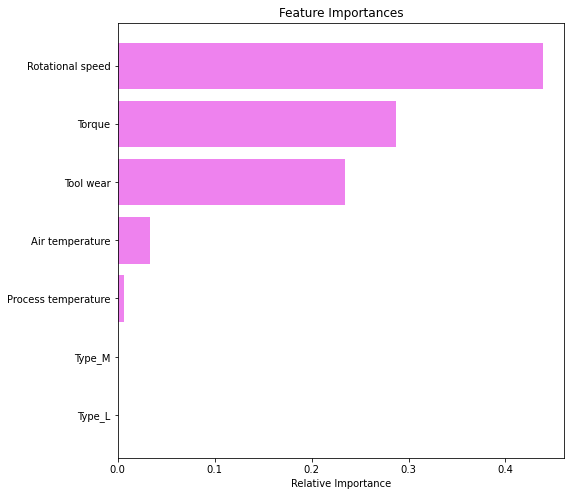

In [53]:
# importance of features in the tree building

importances = estimator.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

* In the pre tuned decision tree also, rotational speed and torque are the most important features.

### Decision Tree (Post pruning)

The `DecisionTreeClassifier` provides parameters such as
``min_samples_leaf`` and ``max_depth`` to prevent a tree from overfiting. Cost
complexity pruning provides another option to control the size of a tree. In
`DecisionTreeClassifier`, this pruning technique is parameterized by the
cost complexity parameter, ``ccp_alpha``. Greater values of ``ccp_alpha``
increase the number of nodes pruned. Here we only show the effect of
``ccp_alpha`` on regularizing the trees and how to choose a ``ccp_alpha``
based on validation scores.

**Total impurity of leaves vs effective alphas of pruned tree**

Minimal cost complexity pruning recursively finds the node with the "weakest
link". The weakest link is characterized by an effective alpha, where the
nodes with the smallest effective alpha are pruned first. To get an idea of
what values of ``ccp_alpha`` could be appropriate, scikit-learn provides
`DecisionTreeClassifier.cost_complexity_pruning_path` that returns the
effective alphas and the corresponding total leaf impurities at each step of
the pruning process. As alpha increases, more of the tree is pruned, which
increases the total impurity of its leaves.

In [54]:
clf = DecisionTreeClassifier(random_state=1, class_weight="balanced")
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = abs(path.ccp_alphas), path.impurities

In [55]:
pd.DataFrame(path)

,ccp_alphas,impurities
0,0.00000,-0.00000
1,0.00000,-0.00000
2,0.00000,-0.00000
3,0.00000,-0.00000
4,0.00000,-0.00000
5,0.00000,-0.00000
6,0.00000,-0.00000
7,0.00000,-0.00000
8,0.00000,-0.00000
9,0.00000,-0.00000


In [55]:
pd.DataFrame(path)

,ccp_alphas,impurities
0,0.00000,-0.00000
1,0.00000,-0.00000
2,0.00000,-0.00000
3,0.00000,-0.00000
4,0.00000,-0.00000
5,0.00000,-0.00000
6,0.00000,-0.00000
7,0.00000,-0.00000
8,0.00000,-0.00000
9,0.00000,-0.00000


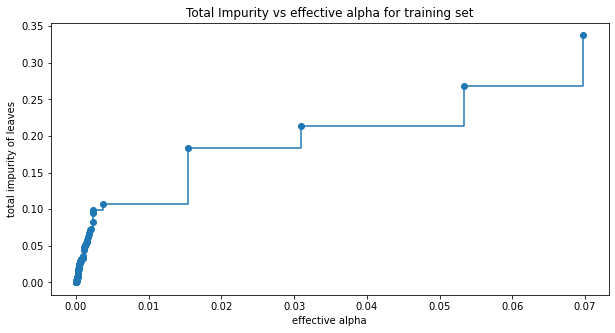

In [56]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

Next, we train a decision tree using the effective alphas. The last value
in ``ccp_alphas`` is the alpha value that prunes the whole tree,
leaving the tree, ``clfs[-1]``, with one node.

In [57]:
%%time
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(
        random_state=1, ccp_alpha=ccp_alpha, class_weight="balanced"
    )
    clf.fit(X_train, y_train)
    clfs.append(clf)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is: 1 with ccp_alpha: 0.16262558100395574
CPU times: user 1.94 s, sys: 8.57 ms, total: 1.95 s
Wall time: 1.95 s


For the remainder, we remove the last element in
``clfs`` and ``ccp_alphas``, because it is the trivial tree with only one
node. Here we show that the number of nodes and tree depth decreases as alpha
increases.

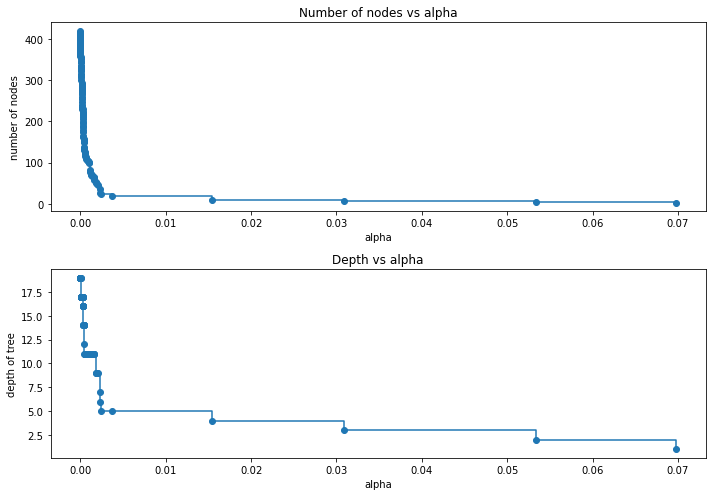

In [58]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1, figsize=(10, 7))
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

In [59]:
recall_train = []
for clf in clfs:
    pred_train = clf.predict(X_train)
    values_train = recall_score(y_train, pred_train)
    recall_train.append(values_train)

In [60]:
recall_test = []
for clf in clfs:
    pred_test = clf.predict(X_test)
    values_test = recall_score(y_test, pred_test)
    recall_test.append(values_test)

In [61]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

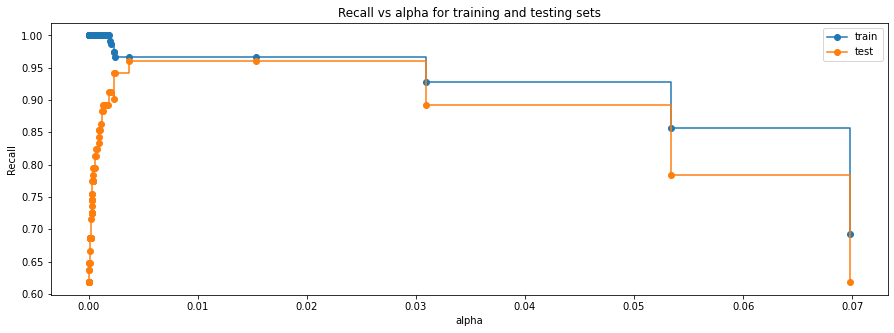

In [62]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.set_xlabel("alpha")
ax.set_ylabel("Recall")
ax.set_title("Recall vs alpha for training and testing sets")
ax.plot(
    ccp_alphas, recall_train, marker="o", label="train", drawstyle="steps-post",
)
ax.plot(ccp_alphas, recall_test, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

In [63]:
# creating the model where we get highest train and test recall
index_best_model = np.argmax(recall_test)
best_model = clfs[index_best_model]
print(best_model)

DecisionTreeClassifier(ccp_alpha=0.0036563024178705343, class_weight='balanced',
                       random_state=1)


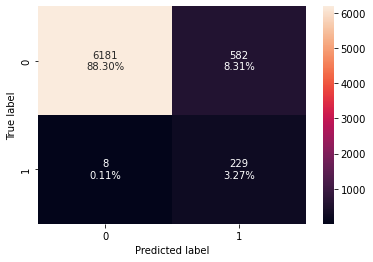

In [64]:
confusion_matrix_sklearn(best_model, X_train, y_train)

In [65]:
decision_tree_post_perf_train = model_performance_classification_sklearn(
    best_model, X_train, y_train
)
decision_tree_post_perf_train

,Accuracy,Recall,Precision,F1
0,0.91571,0.96624,0.28237,0.43702


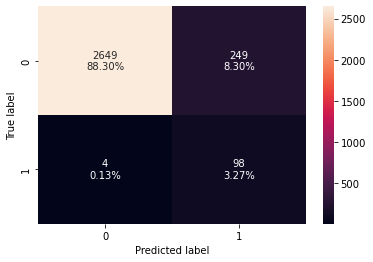

In [66]:
confusion_matrix_sklearn(best_model, X_test, y_test)

In [67]:
decision_tree_post_test = model_performance_classification_sklearn(
    best_model, X_test, y_test
)
decision_tree_post_test

,Accuracy,Recall,Precision,F1
0,0.91567,0.96078,0.28242,0.43653


* In the post-pruned tree also, the model is giving a generalized result since the recall scores on both the train and test data are coming to be around 0.96 which shows that the model is able to generalize well on unseen data.

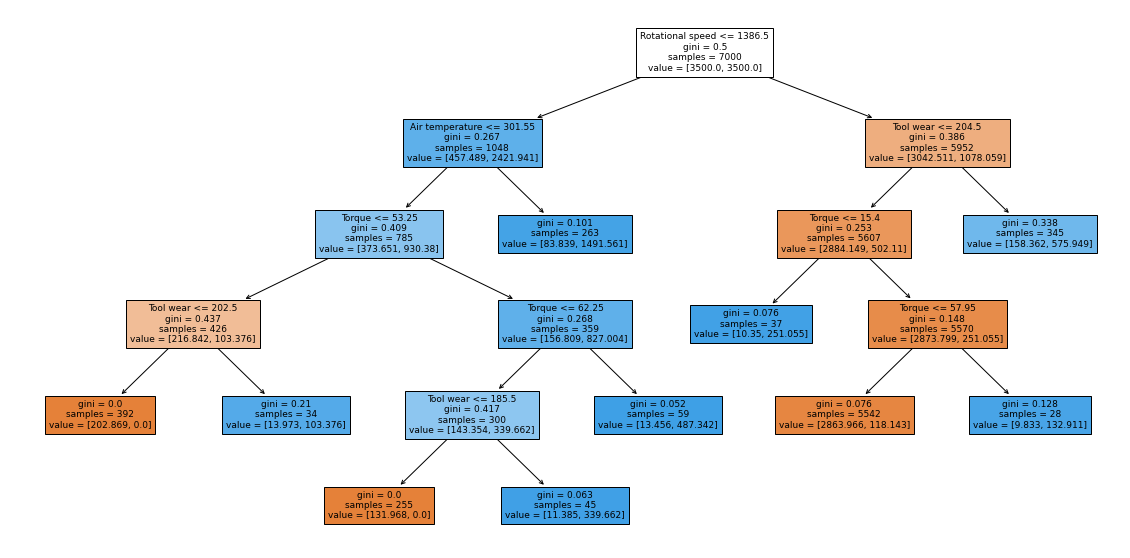

In [68]:
plt.figure(figsize=(20, 10))

out = tree.plot_tree(
    best_model,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [69]:
# Text report showing the rules of a decision tree -

print(tree.export_text(best_model, feature_names=feature_names, show_weights=True))


|--- Rotational speed <= 1386.50
|   |--- Air temperature <= 301.55
|   |   |--- Torque <= 53.25
|   |   |   |--- Tool wear <= 202.50
|   |   |   |   |--- weights: [202.87, 0.00] class: 0
|   |   |   |--- Tool wear >  202.50
|   |   |   |   |--- weights: [13.97, 103.38] class: 1
|   |   |--- Torque >  53.25
|   |   |   |--- Torque <= 62.25
|   |   |   |   |--- Tool wear <= 185.50
|   |   |   |   |   |--- weights: [131.97, 0.00] class: 0
|   |   |   |   |--- Tool wear >  185.50
|   |   |   |   |   |--- weights: [11.39, 339.66] class: 1
|   |   |   |--- Torque >  62.25
|   |   |   |   |--- weights: [13.46, 487.34] class: 1
|   |--- Air temperature >  301.55
|   |   |--- weights: [83.84, 1491.56] class: 1
|--- Rotational speed >  1386.50
|   |--- Tool wear <= 204.50
|   |   |--- Torque <= 15.40
|   |   |   |--- weights: [10.35, 251.05] class: 1
|   |   |--- Torque >  15.40
|   |   |   |--- Torque <= 57.95
|   |   |   |   |--- weights: [2863.97, 118.14] class: 0
|   |   |   |--- Torque >  

- We can see that the observation we got from the pre-pruned tree is also matching with the decision tree rules of the post pruned tree.

In [70]:
importances = best_model.feature_importances_
indices = np.argsort(importances)

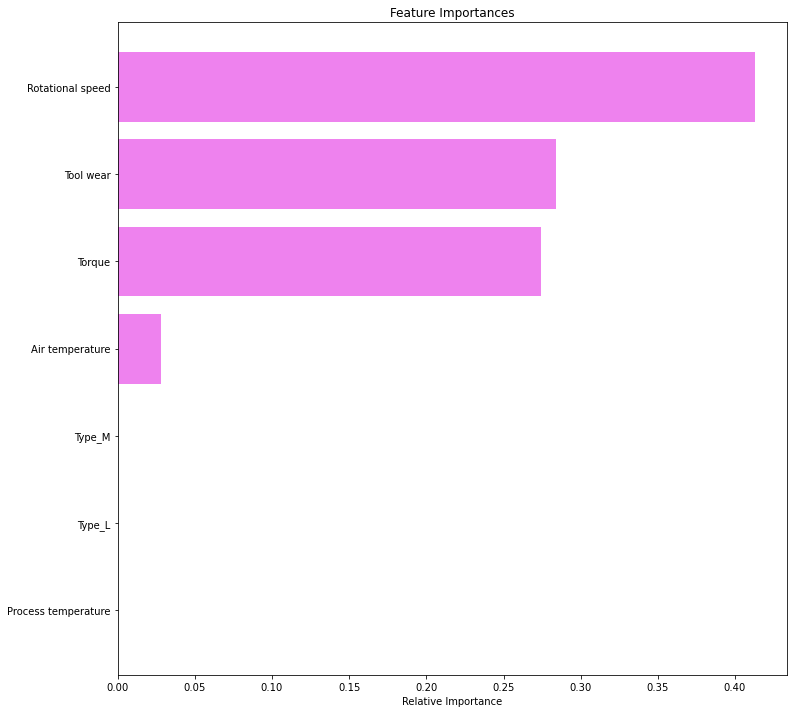

In [71]:
plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

- Rotational speed and Torque are the most important features for the post pruned tree

## Comparison of Models and Final Model Selection

In [72]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        decision_tree_perf_train_without.T,
        decision_tree_perf_train.T,
        decision_tree_tune_perf_train.T,
        decision_tree_post_perf_train.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree without class_weight",
    "Decision Tree with class_weight",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Decision Tree without class_weight,Decision Tree with class_weight,Decision Tree (Pre-Pruning),Decision Tree (Post-Pruning)
Accuracy,1.00000,1.00000,0.88100,0.91571
Recall,1.00000,1.00000,0.96624,0.96624
Precision,1.00000,1.00000,0.21727,0.28237
F1,1.00000,1.00000,0.35476,0.43702


In [73]:
# testing performance comparison

models_test_comp_df = pd.concat(
    [
        decision_tree_perf_test_without.T,
        decision_tree_perf_test.T,
        decision_tree_tune_perf_test.T,
        decision_tree_post_test.T,
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Decision Tree without class_weight",
    "Decision Tree with class_weight",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
]
print("Test set performance comparison:")
models_test_comp_df

Test set performance comparison:


,Decision Tree without class_weight,Decision Tree with class_weight,Decision Tree (Pre-Pruning),Decision Tree (Post-Pruning)
Accuracy,0.97300,0.97433,0.87867,0.91567
Recall,0.63725,0.61765,0.96078,0.96078
Precision,0.59633,0.62376,0.21397,0.28242
F1,0.61611,0.62069,0.35000,0.43653


* Decision tree models with pre-pruning and post-pruning both are giving equally high recall scores on both training and test sets.
* However, we will choose the post pruned tree as the best model since it is giving a slightly high precision score on the train and test sets than the pre-pruned tree. 

## Conclusions and Recommendations

- The model built can be used to predict if a machine is going to fail or not and can correctly identify 96.1% of the machine failures

- Rotational speed, torque and tool wear are the most important variables in predicting whether a machine will fail or not 


- From the decision tree, it has been observed that if the rotational speed is less than or equal to 1379.50, the air temperature is less than or equal to 301.55, the torque is less than or equal to 52.85 and the tool wear is greater than 206.50, then the machine is most likey to fail
  - The company should give a vigilant eye for these values in order to detect machine failure.


- The company should use more data for the analysis to get more reliable results


- As the variable used vary with the type of operation (turning, drilling, etc.) being performed, the company can look to build separate models for each different type of operation

## <a name='link1'>Appendix: Detailed Exploratory Data Analysis (EDA)</a>

### Univariate Analysis

#### Observation on Air temperature

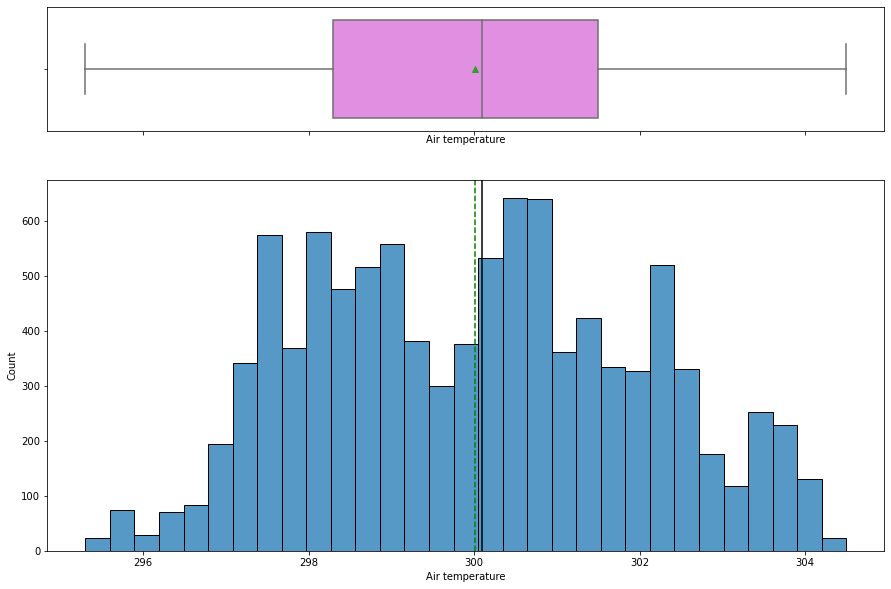

In [74]:
histogram_boxplot(data, "Air temperature")

* The `air temperature` distribution looks slightly left skewed with a mean temperature around 300K.
* There is no outlier present.

#### Observation on Process temperature

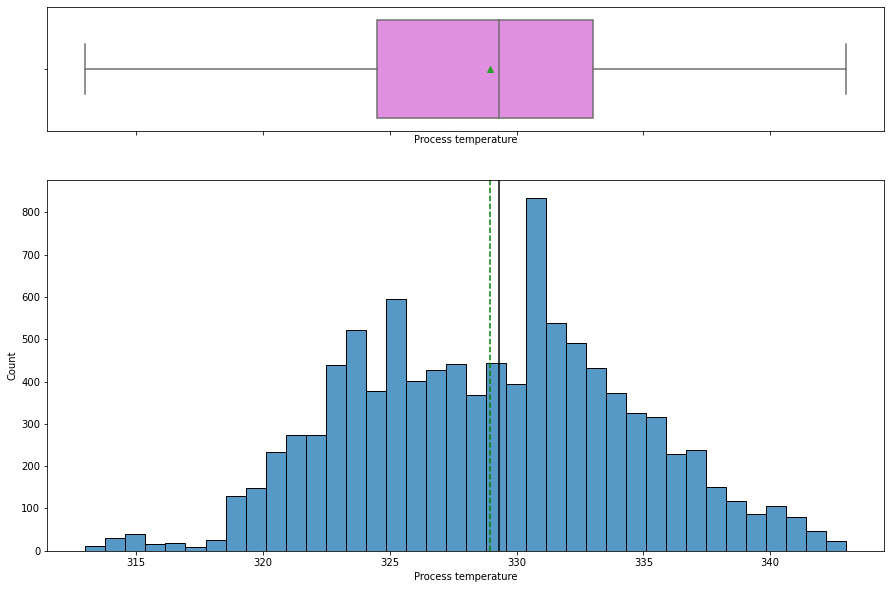

In [75]:
histogram_boxplot(data, "Process temperature")

* The `process temperature` distribution looks slightly left skewed with a mean temperature around 329K.
* There is no outlier present.

#### Observation on Rotational Speed

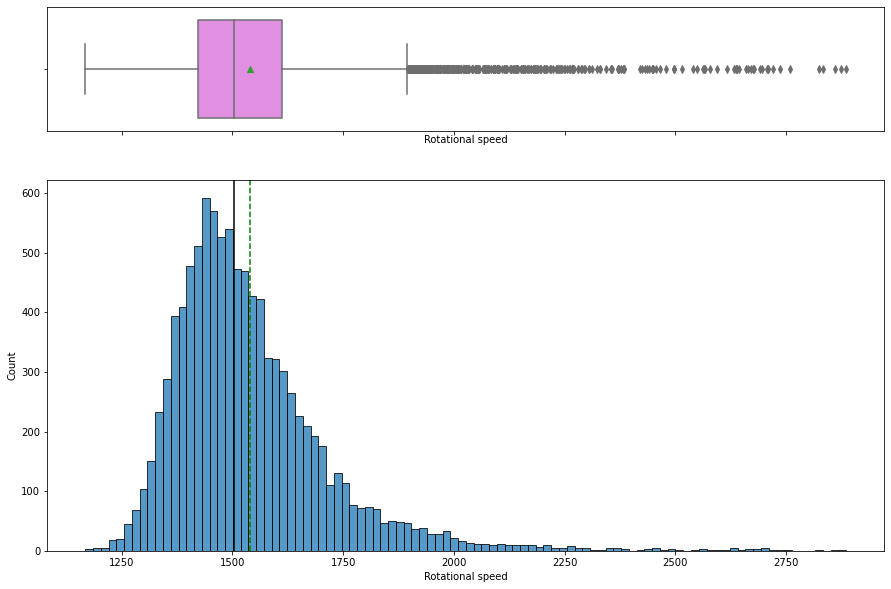

In [76]:
histogram_boxplot(data, "Rotational speed")

* The `rotational speed` is right skewed with many outliers on the upper quartile.
* Some of the manufacturing operations are performed at a higher speed. 

#### Observation on Torque

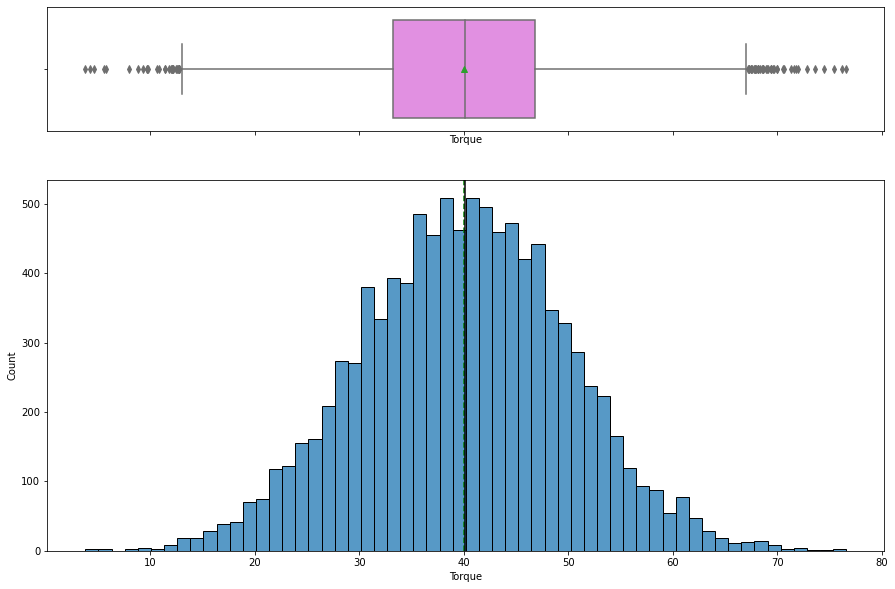

In [77]:
histogram_boxplot(data, "Torque")

* The distribution of `torque` is normal with mean torque around 40 Nm.
* Outliers are present on both sides.

#### Observation on Tool Wear

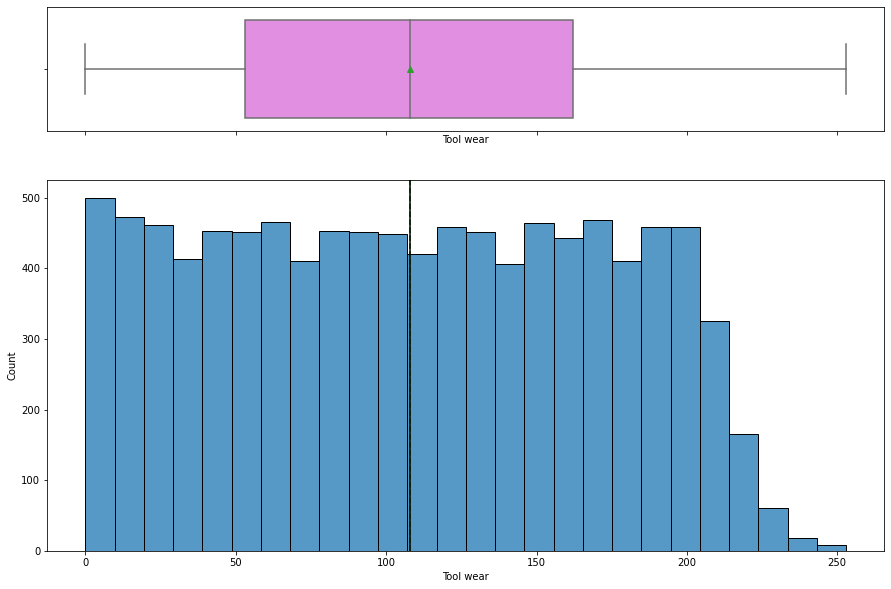

In [78]:
histogram_boxplot(data, "Tool wear")

* `Tool wear` is uniformly distributed with some of the higher values being less frequent.

#### Observation on Type of product

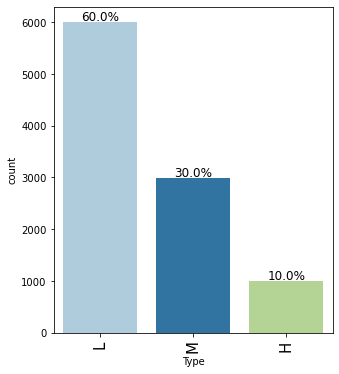

In [79]:
labeled_barplot(data, "Type", perc=True)

* Around 60% of products are of low quality, 30% are of medium quality whereas 10% are of high quality

#### Observation on `Failure`

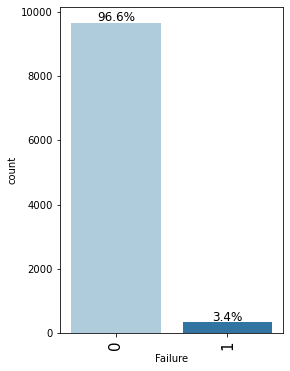

In [80]:
labeled_barplot(data, "Failure", perc=True)

* In 96.6% of observations the machine does not fail while in 3.4% of observations it fails.

### Bivariate Analysis

#### Correlation Check

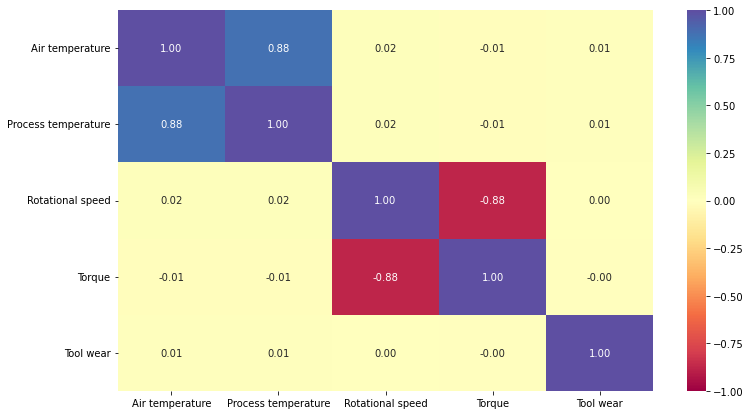

In [81]:
cols_list = data.select_dtypes(include=np.number).columns.tolist()
cols_list.remove('Failure')

plt.figure(figsize=(12, 7))
sns.heatmap(
    data[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

* There's a positive correlation between the `air temperature` and `process temperature`.
* There's a negative correlation between the `rotational speed` and `torque`. 
* No other variables are correlated. We will analyze it further.

#### Observation on `Type` vs `Air temperature`

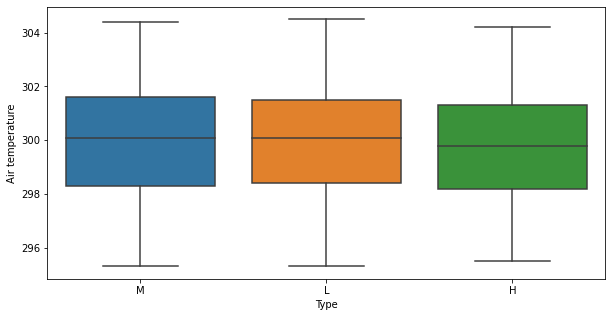

In [82]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=data, x="Type", y="Air temperature")
plt.show()

* There is no distinct difference in values of `Air temperature` and `Type`

#### Observation on `Type` vs `Process temperature`

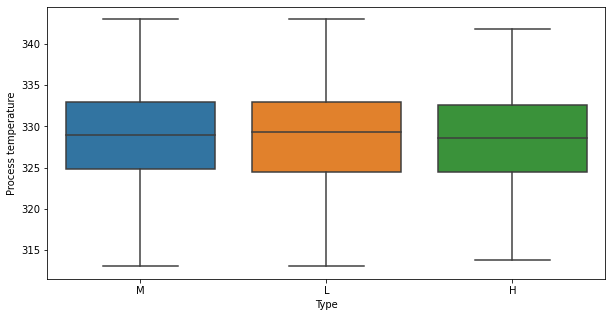

In [83]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=data, x="Type", y="Process temperature")
plt.show()

* There is no distinct difference in values of `Process temperature` and `Type` for M and L types. 
* Lesser `Process temperature` is observed in manufacturing H type of products.

#### Observation on `Type` vs `Rotational speed`

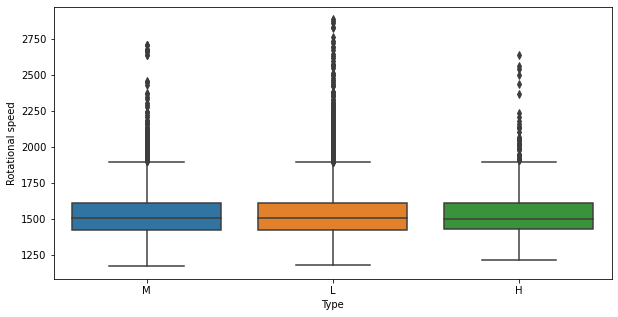

In [84]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=data, x="Type", y="Rotational speed")
plt.show()

* Some of the L type of products are manufactured at higher rotational speed

#### Observation on `Type` vs `Tool wear`

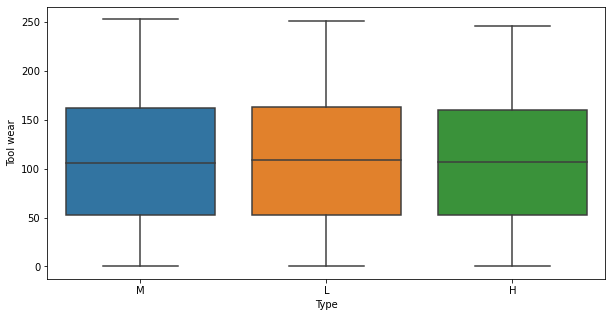

In [85]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=data, x="Type", y="Tool wear")
plt.show()

* There is no distinct difference in values of `Tool wear` and `Type`

#### Observation on `Type` vs `Torque`

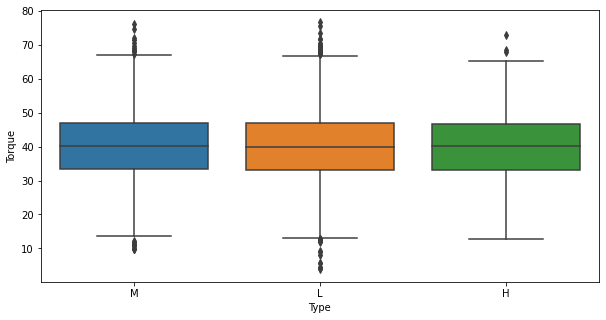

In [86]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=data, x="Type", y="Torque")
plt.show()

* Some of the L type products are manufactured at lower `Toque` as compared to M and H type of products.

#### Failure vs Type

**Let's see how the target variable varies across the type of the product**

Failure     0    1    All
Type                     
All      9661  339  10000
L        5765  235   6000
M        2914   83   2997
H         982   21   1003
------------------------------------------------------------------------------------------------------------------------


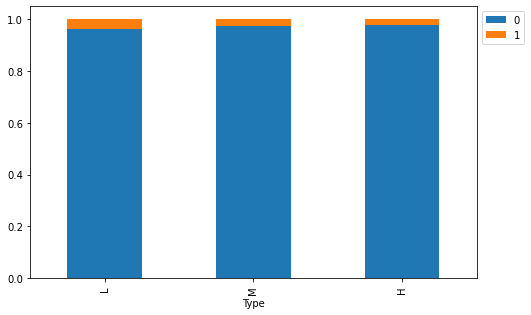

In [87]:
stacked_barplot(data, "Type", "Failure")

* Around 70 % of the failure occurred during machining of L type i.e., low-quality products.
* Machining of high-quality products is less prone to failure.

#### Distribution of numerical input variables by failure status

**Let's analyze the relation between `Air temperature` and `Failure`.**

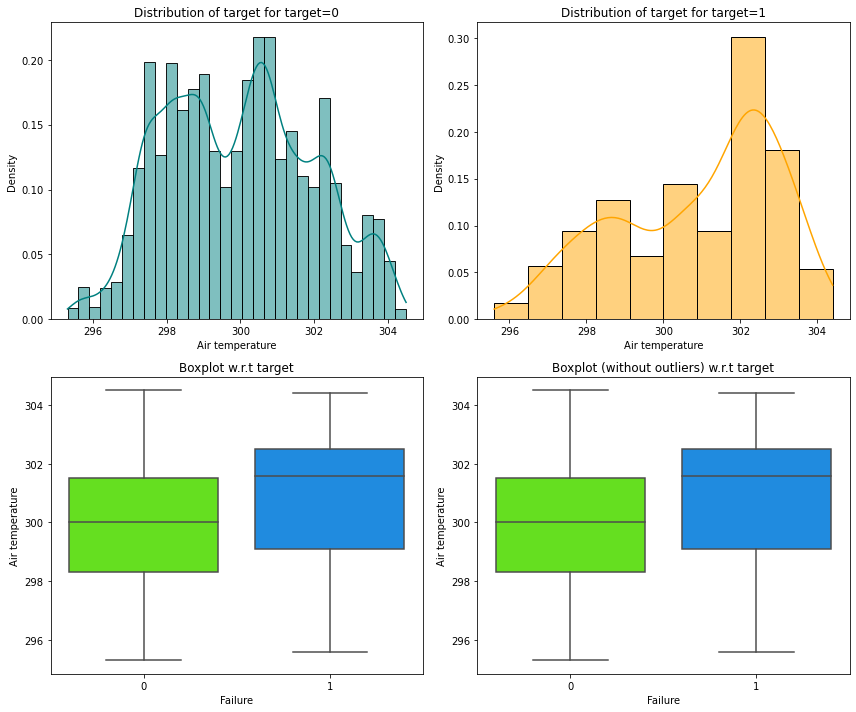

In [88]:
distribution_plot_wrt_target(data, "Air temperature", "Failure")

* Most of the failures of the manufacturing system occur at higher `Air temperature`.


**Let's analyze the relation between `Process temperature` and `Failure`.**

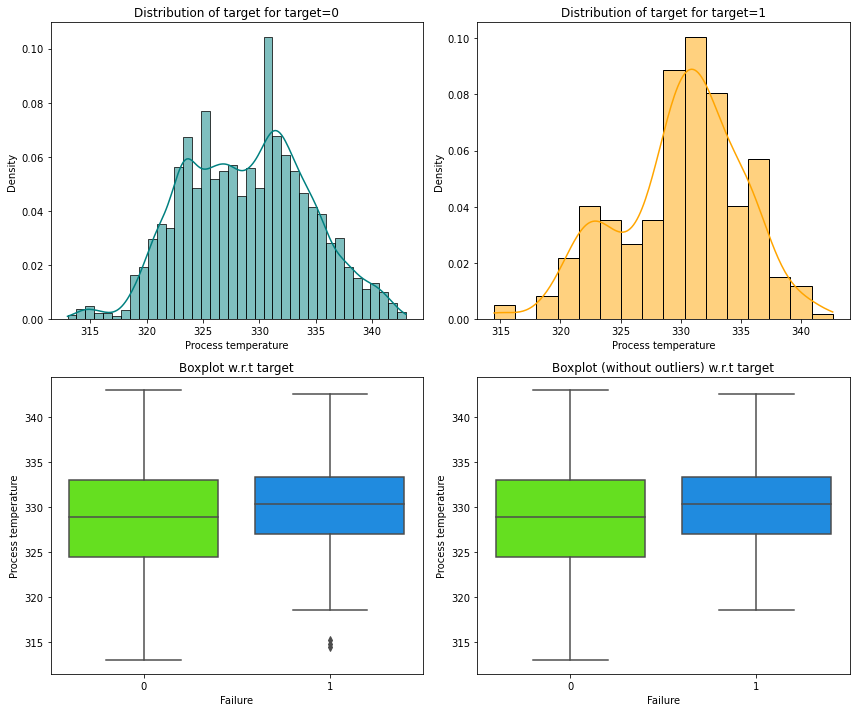

In [89]:
distribution_plot_wrt_target(data, "Process temperature", "Failure")

* Most of the failures of the manufacturing system occur at higher `Process temperature`.

**Let's analyze the relation between `Rotational speed` and `Failure`.**

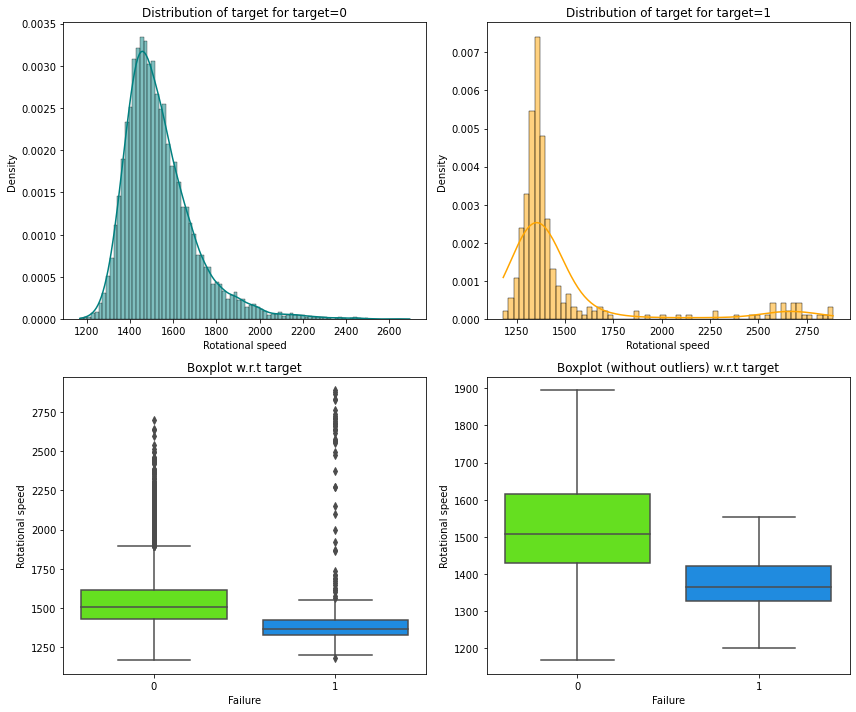

In [90]:
distribution_plot_wrt_target(data, "Rotational speed", "Failure")

* Manufacturing system is more prone to failure at lower `Rotational speed` than at higher rotational speed.

**Let's analyze the relation between `Torque` and `Failure`.**

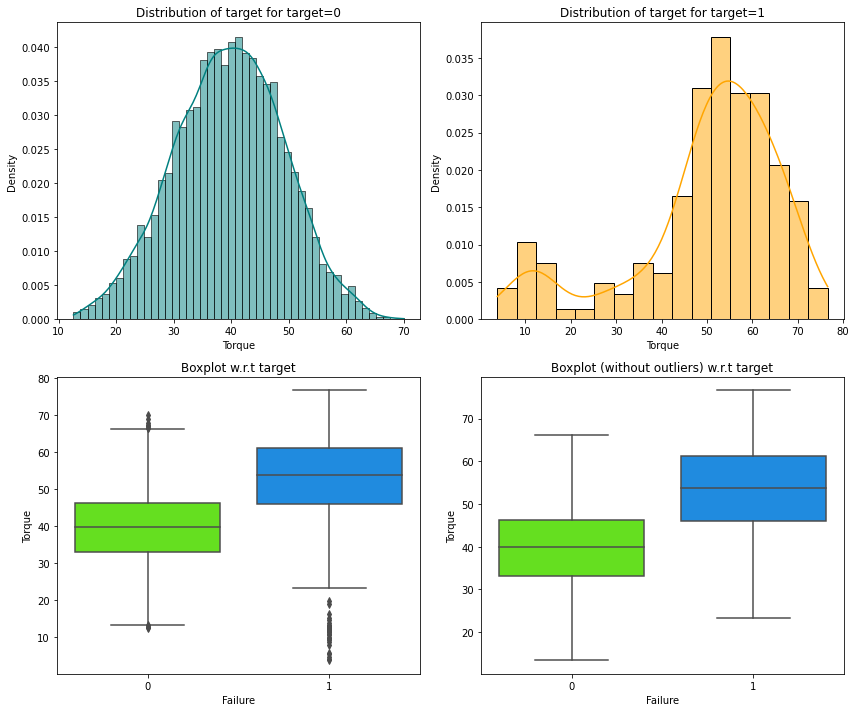

In [91]:
distribution_plot_wrt_target(data, "Torque", "Failure")

* Most of the failures of the manufacturing system occur at higher torque as compared to lower values of torque.

**Let's analyze the relation between `Tool wear` and `Failure`.**

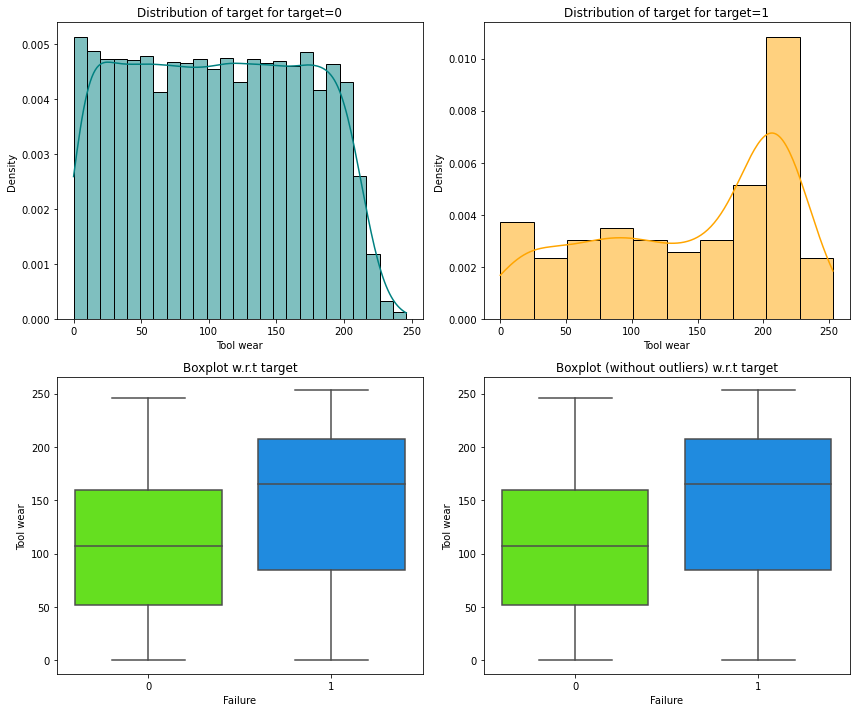

In [92]:
distribution_plot_wrt_target(data, "Tool wear", "Failure")

* Most of the failures occur at higher values of tool wear than at lower tool wear.

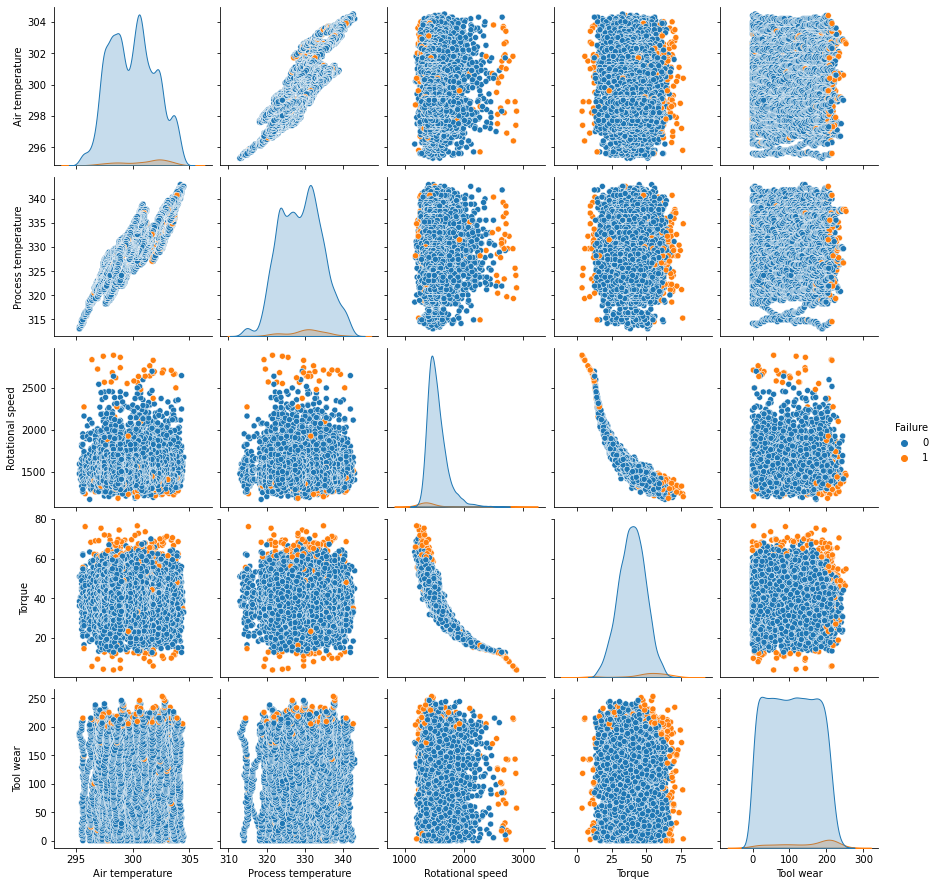

In [93]:
sns.pairplot(data, hue="Failure")

- The correlation between air temperature and process temperature and torque and rotational speed is visible here too

### To jump back to the EDA summary section, click <a href = #link2>here</a>.

___